In [ ]:
%%capture

!rm *.csv*

#@title Download Scrapped Data from Inteli.Gente
!wget "https://github.com/Rafaelsoz/Pratica-Ciencia-Dados-II/raw/main/datasets/Dimens%C3%B5es/Econ%C3%B4mica.csv"
!wget "https://github.com/Rafaelsoz/Pratica-Ciencia-Dados-II/raw/main/datasets/Dimens%C3%B5es/Capacidades%20Institucionais.csv"
!wget "https://github.com/Rafaelsoz/Pratica-Ciencia-Dados-II/raw/main/datasets/Dimens%C3%B5es/Meio%20Ambiente.csv"
!wget "https://github.com/Rafaelsoz/Pratica-Ciencia-Dados-II/raw/main/datasets/Dimens%C3%B5es/Sociocultural.csv"

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("darkgrid")

In [ ]:
# Load data
ECO = pd.read_csv("Econômica.csv").iloc[:, 1:]
CI = pd.read_csv("Capacidades Institucionais.csv").iloc[:, 1:]
MA = pd.read_csv("Meio Ambiente.csv").iloc[:, 1:]
SC = pd.read_csv("Sociocultural.csv").iloc[:, 1:]

In [ ]:
#@markdown Percebemos que todas as dimensões possuem valores nulos (NaNs) em várias cidades. Isso acontece por que a plataforma Inteli.Gente não encontrou dados sobre aquele atributo para aquele município. Na análise da plataforma, os valores nulos são considerados 0, então vamos substituir todos os valores nulos por zero nos dados.
ECO = ECO.fillna(0)
CI = CI.fillna(0)
MA = MA.fillna(0)
SC = SC.fillna(0)

In [ ]:
ECO.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 34 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Codigo                                                                    5570 non-null   int64  
 1   Nome                                                                      5570 non-null   object 
 2   Nivel                                                                     5570 non-null   int64  
 3   Índice da população total com atendimento de água                         5570 non-null   float64
 4   Índice da população total com atendimento de esgoto                       5570 non-null   float64
 5   Índice da população urbana com atendimento de esgoto                      5570 non-null   float64
 6   Taxa da população coberta com serviço de coleta de resíduos     

In [ ]:
#@title Seleciona Apenas Colunas Numéricas e Remove Colunas com Valores Constantes

# Converte "Coleta seletiva de resíduos no município" de booleano para inteiro
ECO["Coleta seletiva de resíduos no município"] = ECO["Coleta seletiva de resíduos no município"].astype("int64")

# Select only numerical values
df = ECO[ECO.columns[(ECO.dtypes == "float64") | (ECO.dtypes == "int64")]]

# Remove 'Codigo' & 'Nivel'
df = df.iloc[:, 1:]

# Remove constant valued columns
df = df[df.columns[df.nunique() > 1]]

df

,Nivel,Índice da população total com atendimento de água,Índice da população total com atendimento de esgoto,Índice da população urbana com atendimento de esgoto,Taxa da população coberta com serviço de coleta de resíduos,Coleta seletiva de resíduos no município,Percentual de domicílios com população vivendo em aglomerados subnormais,Assentamentos urbanos precários,Programas e ações habitacionais,Serviços regulares de transporte de passageiros,...,Números de estações rádio base,Qualificação profissional e intermediação de mão de obra,Inclusão produtiva urbana,"Acesso a crédito, microcrédito e seguro",Geração de trabalho e renda no município,Sistema de informação geográfica da prefeitura,Centros de comando e controle para gestão da cidade,Plataforma integrada de cidade inteligente,Serviços no website da prefeitura,Dados abertos da gestão municipal
0,4,35.10,17.29,48.72,80.44,0,1.72,2,3,9,...,26,0,0,4,0,6,2,0.0,14,9
1,3,62.12,0.00,0.00,93.27,1,0.00,0,3,5,...,47,0,0,0,0,6,0,0.0,7,9
2,4,89.94,81.91,94.49,58.03,0,0.00,1,3,4,...,81,0,0,0,0,5,2,0.0,17,8
3,4,86.14,10.68,10.56,86.14,0,0.00,1,2,7,...,39,0,4,0,4,6,2,0.0,11,9
4,4,17.79,0.00,0.00,74.04,0,2.58,2,8,10,...,13,6,0,4,4,6,0,0.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,3,83.79,7.82,19.84,73.97,0,0.00,0,2,4,...,20,0,0,4,0,6,1,0.0,9,8
5566,3,100.00,0.00,0.00,94.25,0,0.00,0,1,2,...,89,5,7,0,4,3,0,0.0,4,7
5567,4,70.02,65.68,100.00,81.72,0,0.00,1,5,1,...,148,5,0,4,0,6,1,0.0,9,8
5568,3,12.86,0.00,0.00,96.08,0,1.46,2,3,9,...,36,0,0,0,0,1,0,0.0,5,8


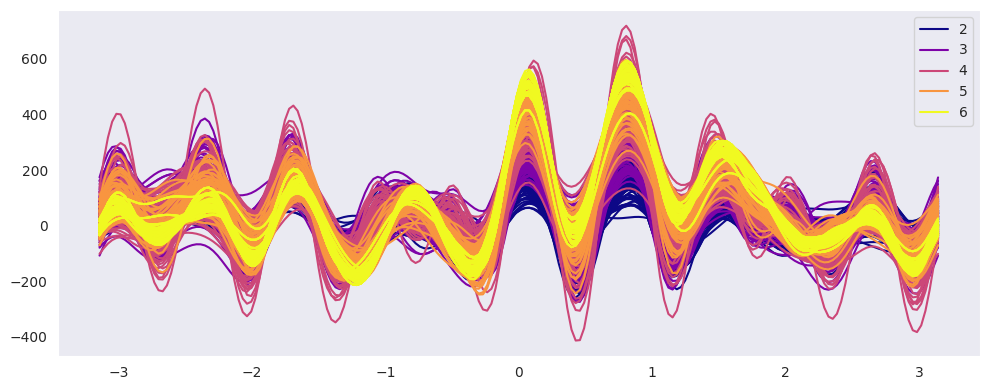

In [ ]:
#@title Grafico das Curvas de Andrew para o Dataset
sample = df.groupby("Nivel").sample(100, replace=True).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 4))

pd.plotting.andrews_curves(sample, 'Nivel', colormap="plasma", ax=ax)

fig.tight_layout()
plt.show()

In [ ]:
#@title Gráfico de Coordenadas Paralelas do Dataset
import plotly.express as px

sample = df.groupby("Nivel").sample(100, replace=True).reset_index(drop=True)

fig = px.parallel_coordinates(sample,
                              color="Nivel",
                              labels={column: idx for idx, column in enumerate(sample.columns)})
fig.show()

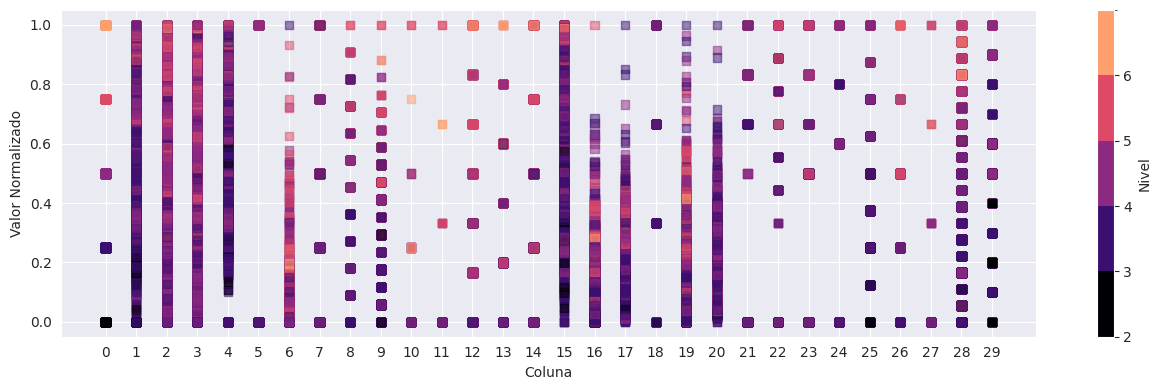

In [ ]:
#@title Scatterplots 1D para cada Coluna do Dataset
import numpy as np
import pandas as pd

import matplotlib.colors as mcolors
from matplotlib import pyplot as plt


def multi_scatter_1d(data: pd.DataFrame,
                     target: str,
                     colormap: str = "magma"):
  """
  Plots all pd.DataFrame columns values with unidimensional scatter plots.

  Usage
  -----
    >> multi_scatter_1d(data=df, target="Nivel")

  Parameters
  ----------
  data: pd.DataFrame
    Object with the data to be ploted.

  target: str
    Name of the target column to use to colorize the plot points

  colormap: str
    Matplotlib colormap name to use as color pallete source.
  """

  # Get target data to color the scatter-points
  targets = data[target]

  # Check how many values the target have
  n_targets = len(targets.unique())

  fig, ax = plt.subplots(figsize=(13, 4))

  # Create a discrete colormap with N colors
  cmap = plt.get_cmap(colormap, n_targets + 1)
  norm = mcolors.BoundaryNorm(
      boundaries=np.arange(targets.min(), targets.max() + 2, 1),
      ncolors=n_targets
  )

  for idx, column in enumerate(data.columns):

    # Get data from current column
    column_data = data[column]

    # Compute the x-axis with constant values
    x = idx * np.ones(data.shape[0])

    # Normalize data to the range of [0, 1]
    y = (column_data - column_data.min()) / (column_data.max() - column_data.min())

    # Create a scatter plot with only one-dimension
    scatter = plt.scatter(x, y, c=targets, cmap=cmap, norm=norm, alpha=0.5, marker="s")

  # Add a discretized colorbar to the plot
  scatter.set_alpha(1.0)
  cbar = plt.colorbar(scatter, ticks=sorted(targets.unique()))
  cbar.set_label(target)

  # Add labels to the plot
  ax.set_xticks(np.arange(data.shape[1]))
  ax.set_xlabel("Coluna")
  ax.set_ylabel("Valor Normalizado")

  fig.tight_layout()
  plt.show()

sample = df.groupby("Nivel").sample(100, replace=True).reset_index(drop=True)

multi_scatter_1d(df, "Nivel")

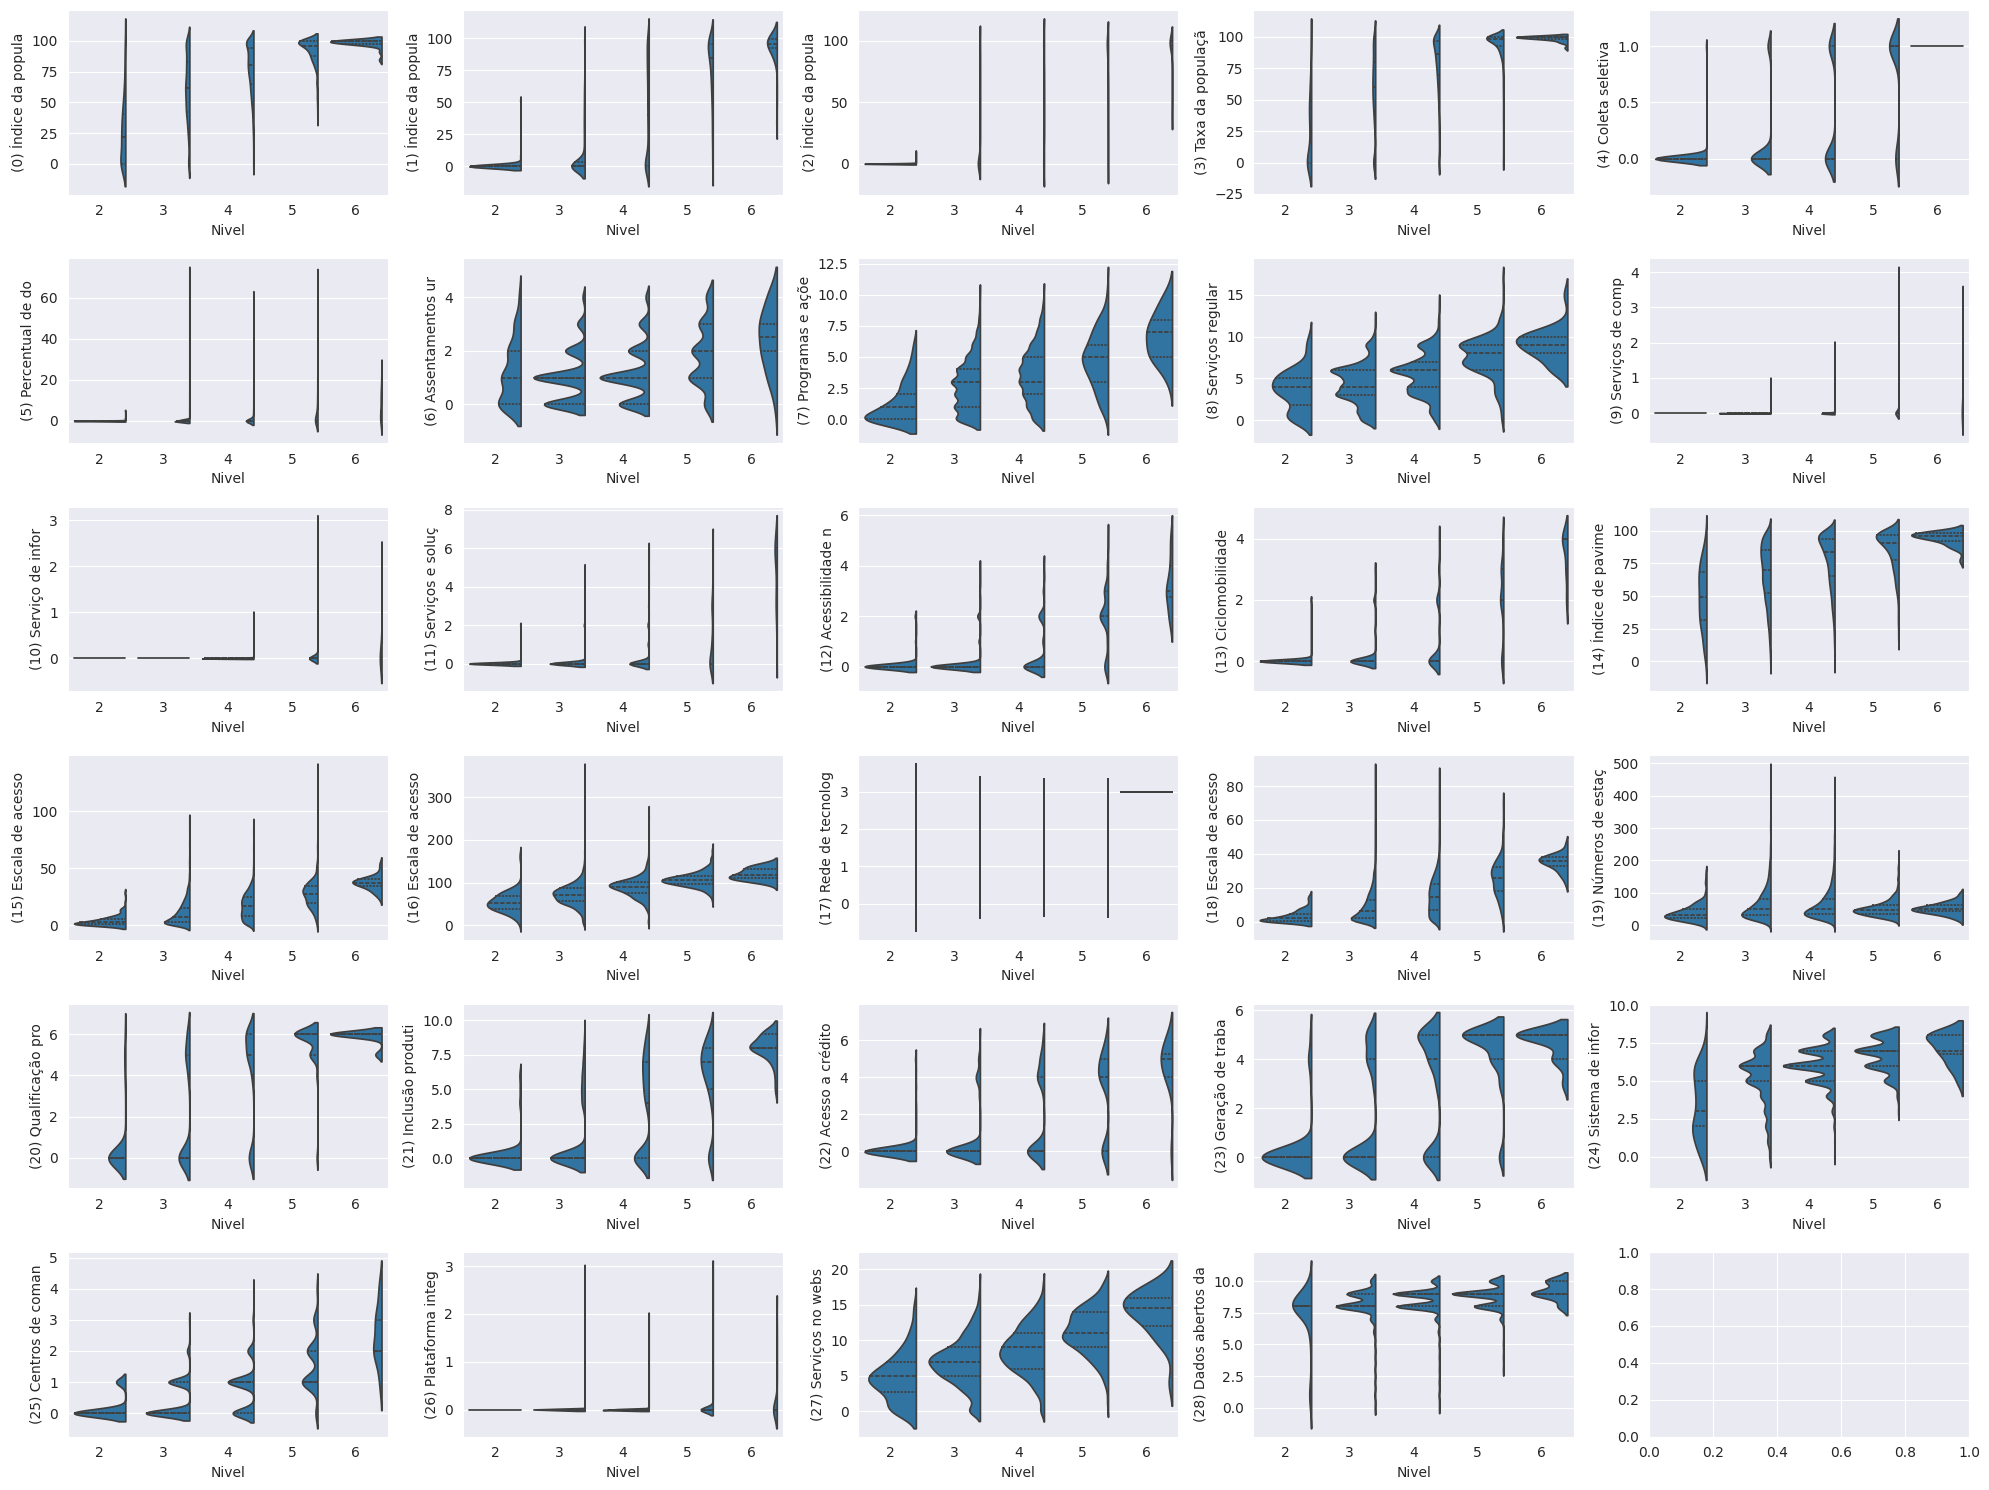

In [ ]:
#@title Distribuição dos Valores das Colunas Separados pelo Nível
fig, axs = plt.subplots(6, 5, figsize=(20, 15))

for idx, ax in enumerate(axs.flatten()[:df.shape[1] - 1]):

  sns.violinplot(
    data=df,
    y=df.iloc[:, idx + 1], x="Nivel",
    split=True, inner="quart", ax=ax
  )

  ax.set_ylabel(f"({idx}) {df.columns[idx + 1][:16]}")

fig.tight_layout()
plt.show()

In [ ]:
df.columns = [f"{label[:16]}..." if len(label) > 16 else label for label in df.columns]

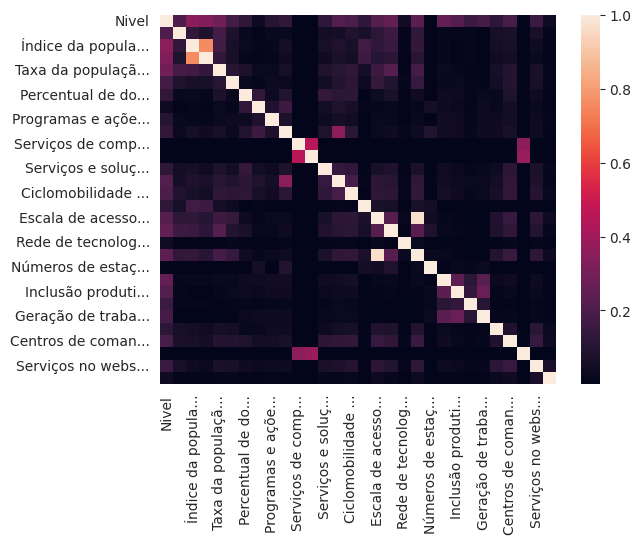

In [ ]:
#@title Correlograma dos Atributos com Valor Absoluto
from matplotlib import pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(df.corr(method="spearman") ** 2)
plt.show()

<Axes: xlabel='Nivel', ylabel='Serviços no website da prefeitura'>

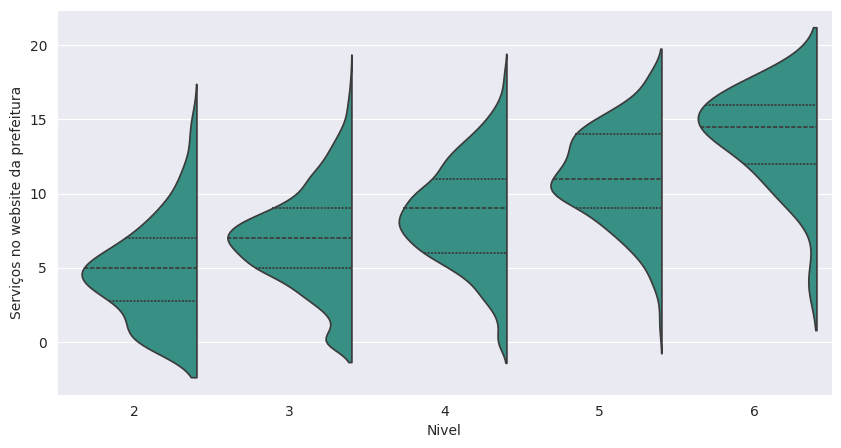

In [ ]:
X = ECO['Nivel']
Y = ECO['Serviços no website da prefeitura']

import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Define a paleta de cores para usar no plot
palette = sns.dark_palette("#05445E", reverse=True, as_cmap=True)

sns.violinplot(
	y=Y, x=X, ax=ax, color="#2a9d8f", # palette=palette, hue=X,
	split=True, inner="quart"
)